# Setup

## Function Setup

In [1]:
import re
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from typing import List, Tuple
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Tuple
import matplotlib.pyplot as plt
import venn



In [2]:
def preprocess_string(s: str) -> List[str]:
    # Split the string into sentences, then split each sentence into words
    words = re.findall(r'\b\w+\b', s)
    return words

def similarity_and_venn_diagram(strings_a: List[str], strings_b: List[str], strings_c: List[str]) -> Tuple[float, float, float]:
    words_a = {str(word) for s in strings_a for word in strings_a}
    words_b = {str(word) for s in strings_b for word in strings_b}
    words_c = {str(word) for s in strings_c for word in strings_c}

    intersection_ab = words_a.intersection(words_b)
    intersection_ac = words_a.intersection(words_c)
    intersection_bc = words_b.intersection(words_c)
    intersection_abc = words_a.intersection(words_b, words_c)

    union = words_a.union(words_b, words_c)

    current_palette = sns.color_palette()

    color_a, color_b, color_c = current_palette[0], current_palette[1], current_palette[2]


    similarity_ab = len(intersection_ab) / len(union)
    similarity_ac = len(intersection_ac) / len(union)
    similarity_bc = len(intersection_bc) / len(union)

    plt.figure()
    venn3([words_a, words_b, words_c], set_labels=('Protected', 'Excellent', 'Readworthy'), set_colors=(color_a, color_b, color_c))
    # plt.title(f"Similarity AB: {similarity_ab:.2f}, AC: {similarity_ac:.2f}, BC: {similarity_bc:.2f}")
    plt.title("Overlap of articles in article origins")
    plt.show()

    return similarity_ab, similarity_ac, similarity_bc, len(intersection_abc)


def similarity_and_venn_diagram4(strings_a: List[str], strings_b: List[str], strings_c: List[str],
                                strings_d: List[str]) -> Tuple[float, float, float, float]:
    words_a = {str(word) for s in strings_a for word in strings_a}
    words_b = {str(word) for s in strings_b for word in strings_b}
    words_c = {str(word) for s in strings_c for word in strings_c}
    words_d = {str(word) for s in strings_d for word in strings_d}

    intersection_abcd = words_a.intersection(words_b, words_c, words_d)
    union = words_a.union(words_b, words_c, words_d)

    current_palette = sns.color_palette('pastel')

    color_a, color_b, color_c, color_d = current_palette[0], current_palette[1], current_palette[
        2], current_palette[3]
    a = list('bogr')
    similarity_abcd = len(intersection_abcd) / len(union)
    # Seaborn's default color palette in RGBA format with transparency
    colors = [
        (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.5),  # blue
        (1.0, 0.4980392156862745, 0.054901960784313725, 0.5),  # orange
        (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 0.5),  # green
        (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 0.5),  # red
    ]

    labels = venn.get_labels([words_a, words_b, words_c, words_d], fill=['number'])
    fig, ax = venn.venn4(labels,
                         names=['Protected', 'Excellent', 'Readworthy', 'Random'],colors=colors
                         )
    plt.title("Overlap of articles in article origins")
    plt.show()

    return similarity_abcd, len(intersection_abcd)


## Data Setup

In [3]:
whole_dict = {
    'protected': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')
    },
    'excellent': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
    },
    'readworthy': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
    },
    'random': {
        'df':
        pd.read_csv(f'data/data_files/pipeline_steps/random_articles/1_all_articles_fetched.csv'),
        'titles': pd.read_csv(f'data/data_files/pipeline_steps/random_articles/0_random_titles.csv')
    },
}


## Results

/root/miniconda3/envs/jannis-env9/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/root/miniconda3/envs/jannis-env9/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


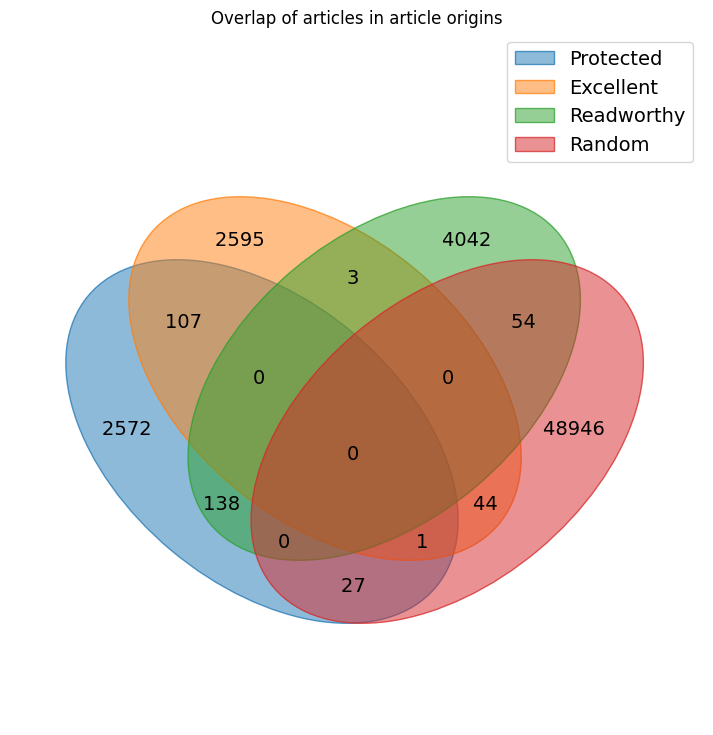

(0.0, 0)

In [4]:
similarity_and_venn_diagram4(list(whole_dict['protected']['titles']['title']),
                            list(whole_dict['excellent']['titles']['title']),
                            list(whole_dict['readworthy']['titles']['title']),
                            list(whole_dict['random']['titles']['title'])
                            )
